<a href="https://colab.research.google.com/github/suwatoh/Python-learning/blob/main/131_HTTP%E3%82%AF%E3%83%A9%E3%82%A4%E3%82%A2%E3%83%B3%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HTTP クライアント
=================

HTTP
----

**HTTP**（Hypertext Transfer Protocol）とは、 Web サーバーと Web クライアントの間でデータの送受信を行うために用いられるプロトコル（通信規約）である。 [IETF](https://ja.wikipedia.org/wiki/Internet_Engineering_Task_Force) を始めとした標準化団体により標準化されている。HTTP にはいくつかのバージョンがあり、現在は HTTP/1.1 と HTTP/2 が広く利用されている。最新バージョンは、HTTP/3。URL のスキーム `http` は、この HTTP でリソースにアクセスすることを表す。

HTTP 通信は、TCP のポート番号 80 をデフォルトとして使用する。

HTTP には通信の暗号化についての仕様がないため、データの伝送途上で盗み見られたり内容をすり替えられる危険がある。このため、TLS（Transport Layer Security）と呼ばれる暗号化されたデータの通信路で HTTP 通信を行う方式がとられるようになっている。TLS と組み合わせた HTTP 通信の方式は **HTTPS** と呼ばれ、ポート番号 443 を使用する。URL のスキーム `https` は、HTTPS でリソースにアクセスすることを表す。

HTTP では通信を開始できるのはクライアント側のみであり、クライアントからサーバーにデータを要求し、サーバーが応答を返すのが最も典型的な HTTP のやりとりである。このクライアントからの要求を **HTTP リクエスト**と呼び、サーバーの応答を **HTTP レスポンス**と呼ぶ。HTTP 通信の基本は、HTTP リクエストと HTTP レスポンスという 1 往復のやりとりを必要に応じて繰り返す。

HTTP メソッドと Web API
-----------------------

HTTP リクエストの種類は、**メソッド**として次のように整理される。

| メソッド | 意味 |
|---|---|
| `GET` | リソースの取得 |
| `POST` | データの送信（サーバー上の状態を変更したり、副作用が発生したりすることがよくある） |
| `HEAD` | ヘッダーの取得（`GET` リクエストと同じレスポンスを、コンテンツなしで求める） |
| `PUT` | リソースの作成・更新 |
| `DELETE` | リソースの削除 |
| `CONNECT` | プロキシサーバー（代理サーバー）経由での通信 |
| `OPTIONS` | サーバーの可能な通信オプションの情報の取得 |
| `TRACE` | サーバーまでのネットワーク経路の確認 |

実際の HTTP 通信では `GET` と `POST` メソッドが大部分を占める。一方、 Web サーバーによっては、標準の HTTP メソッド以外のメソッドを受け付けるものがある。`PATCH` メソッドはそのようなメソッドの 1 つで、リソースの部分的な更新を意味する。

Web サーバーによっては、URL と HTTP リクエストと HTTP レスポンスの内容や手順に関する規約が公開されている場合があり、これを **Web API** と呼ぶ。Web API を提供している Web サーバー側では、リソースごとにベースとなる URL を公開している。これを**エンドポイント**（endpoint）と呼ぶことがある。ユーザーが Web API にアクセスするときは、この URL に所定の HTTP メソッドで Web サーバーにリクエストを行う。

[httpbin.org](https://httpbin.org/) は、HTTP リクエストのテストやデバッグのために設計された無料のウェブサービスで、さまざまな HTTP メソッドをテストするための Web API を公開している。エンドポイントは次のとおり。

| メソッド | エンドポイント |
|---|---|
| `GET` | `'https://httpbin.org/get'` |
| `POST` | `'https://httpbin.org/post'` |
| `PUT` | `'https://httpbin.org/put'` |
| `PATCH` | `'https://httpbin.org/patch'` |
| `DELETE` | `'https://httpbin.org/delete'` |

httpbin.org の Web API では、レスポンスのデータ形式が JSON 形式となる。

ステータスコード
----------------

HTTP レスポンスの種類は、**ステータスコード**として整理される。ステータスコードは、3 桁の数字からなり、おおまかな分類が以下となる:

| ステータスコード | 意味 |
|---|---|
| 1xx | Informational: リクエストは受け取られ、処理が継続 |
| 2xx | Success: リクエストに成功 |
| 3xx | Redirection: リダイレクトや移行など、リクエストの完了には追加的な処理が必要 |
| 4xx | Client Error: クライアントからのリクエストに誤りあり |
| 5xx | Server Error: サーバー側でリクエストの処理に失敗 |

ステータスコードには、ステータスコードの意味を簡潔に表現する固有の文字列が付随する。これは**リーズンフレーズ**(reason phras)と呼ばれる。代表的なものは以下のとおり:

  * `200 OK`: リクエストが正常に処理できた
  * `201 Created`: 作成した（リクエストは完了し、新たに作成されたリソースの URI が返される）
  * `301 Moved Permanently`: 恒久的に移動した（リクエストしたリソースが恒久的に移動されているときに返される）
  * `302 Found`: 発見した（リクエストしたリソースが一時的に移動されているときに返される）
  * `303 See Other`: 他を参照せよ（リクエストに対するレスポンスが他の URL に存在するときに返される）
  * `304 Not Modified`: リクエストしたリソースは更新されていない
  * `307 Temporary Redirect`: 同じメソッドで再リクエストが必要（リクエストしたリソースが一時的に移動されているときに返される）
  * `308 Permanent Redirect`: 同じメソッドで再リクエストが必要（リクエストしたリソースが恒久的に移動されているときに返される）
  * `400 Bad Request`: リクエストが不正である
  * `403 Forbidden`: リソースにアクセスすることを拒否された
  * `404 Not Found`: リソースが見つからなかった
  * `405 Method Not Allowed`: 許可されていないメソッドを使用しようとした
  * `429 Too Many Requests`: リクエストが多すぎる（短時間に大量のリクエストを送信してきたため、サーバーが処理を拒否する場合）
  * `500 Internal Server Error`: サーバー内部にエラーが発生した
  * `501 Not Implemented`: 実装されていないメソッドを使用した
  * `503 Service Unavailable`: サーバーが一時的に使用できない

HTTP メッセージ
---------------

HTTP リクエストと HTTP レスポンスをやり取りする仕組みは、**HTTP メッセージ**と呼ばれる。HTTP メッセージの構成は、利用する HTTP のバージョンによって異なる。以降では、現在も広く利用されており、HTTP メッセージの基本的な理解に不可欠な HTTP/1.1 に焦点を当てる。

### 基本的な構成

HTTP/1.1 では HTTP メッセージはテキスト形式であり、改行をもって 1 行ごとに区切られ、次のような構成となる。

``` text
  HTTP メッセージ
┏━━━━━━━━━━━━━━━━━━━┓
┃┌─────────────────┐┃
┃│リクエストライン/ステータスライン │┃ ヘッダーセクション
┃├─────────────────┤┃
┃│ヘッダーフィールド                │┃
┃│ヘッダーフィールド                │┃
┃│ヘッダーフィールド                │┃
┃└─────────────────┘┃
┃ （空行; CR+LF）                      ┃
┃┌─────────────────┐┃
┃│コンテンツ                        │┃
┃├─────────────────┤┃
┃│トレーラーフィールド              │┃ トレーラーセクション
┃│トレーラーフィールド              │┃
┃│トレーラーフィールド              │┃
┃└─────────────────┘┃
┗━━━━━━━━━━━━━━━━━━━┛
```

ヘッダーフィールドは単にヘッダーとも呼ばれる。コンテンツはペイロード、またはメッセージボディ、あるいは単にボディとも呼ばれる。トレーラーフィールドも単にヘッダーとも呼ばれる。

改行は CR+LF（`\r\n`）。ヘッダーセクションとコンテンツの間は、空行（つまり改行 2 つ）で区切られる。ただし、ヘッダーセクションは必須だが、コンテンツとトレーラーセクションは存在しないことがある（トレーラーフィールドはほとんど使われていない）。

HTTP リクエストでは、1 行目がリクエストラインであり、HTTP メソッド、サーバー上のリソースを識別するためのパス、HTTP バージョンが次のように記述される:

``` text
GET / HTTP/1.1\r\n
```

このリクエストラインは、HTTP メソッドが `GET` で、対象とするパスとしてルート `/` を指定している。

HTTP レスポンスでは、1 行目がステータスラインであり、HTTP バージョン、ステータスコード、リーズンフレーズが次のように記述される:

``` text
HTTP/1.1 200 OK\r\n
```

このステータスラインは、ステータスコード/リーズンフレーズが `200 OK` であり、リクエストが正常に処理できたことを示す。

HTTP メッセージの 2 行目以降では、次のように構成されるヘッダーフィールドが並ぶ。

``` text
フィールド名: 値[; パラメータ名=値[; パラメータ名=値...]][, 値[; パラメータ名=値[; パラメータ名=値...]], ...]\r\n
```

フィールド名は、大文字小文字を区別しない。フィールドの値は複数を受け付ける場合があり、その場合にはカンマ区切りで指定する。パラメータ（属性とも呼ばれる）を受け付ける場合があり、その場合には各値の後ろにセミコロンと空白 `'; '` で区切ってパラメータ名と値のペアを `=` を挟む形で並べる。

基本的なヘッダーフィールドは、以下の通り:

| フィールド名 | 値 | パラメータ | 意味 |
|---|---|---|---|
| `Host` | `<host>:<port>` | | 【リクエスト専用】リクエストが送信される先のサーバーのホスト名とポート番号を指定する |
| `User-Agent` | `<product>/<version><comment>` | | 【リクエスト専用】リクエストしているアプリケーション（ユーザーエージェント）の製品情報 |
| `Referer` | `<url>` | |【リクエスト専用】リクエスト中のページにつながるリンクがある直前のページのアドレスを<br /><br />伝える。サーバー側でユーザーの行動分析に利用される。HTTPS 通信でない場合は送信<br /><br />されない |
| `Origin` | `null`<br /><br />`<scheme>://<hostname>`<br /><br />`<scheme>://<hostname>:<port>` | |【リクエスト専用】関連するリクエストが発生したスキーム、ホスト名、ポート番号を伝える。<br /><br />現在と同一なら `null` や省略されることもある |
| `Accept` | `<MIME_type>/<MIME_subtype>` | `q` | 【リクエスト専用】クライアントが受け入れ可能なコンテンツの MIME タイプを指定する。サ<br /><br />ブタイプを指定しない形式 `<MIME_type>/*` や 全ての MIME タイプ `*/*` も指定可能。複<br /><br />数指定可能で、その場合 `q` に重み（優先度）を `0` から `1` までの範囲で指定できる |
| `Accept-Language` | `<language>`<br /><br />`*` | `q` | 【リクエスト専用】クライアントが受け入れ可能な言語（`ja`, `en-US` など）を指定する。複数<br /><br />指定可能で、その場合 `q` に重み（優先度）を `0` から `1` までの範囲で指定できる |
| `Accept-Encoding` | `gzip`<br /><br />`compress`<br /><br />`deflate`<br /><br />`br`<br /><br />`identity`<br /><br />`*` | `q` | 【リクエスト専用】クライアントが受け入れ可能なコンテンツの圧縮アルゴリズムを指定する。<br /><br />`identity` は等価関数（つまり圧縮なし）を示す。複数指定可能で、その場合 `q` に重み（優<br /><br />先度）を `0` から `1` までの範囲で指定できる |
| `Range` | `bytes=<start>-<end>,...`<br/><br />`bytes=-<suffix-length>` | | 【リクエスト専用】リソースの一部を要求する。`bytes` で単位を、整数値 `<start>` で範囲<br /><br />の先頭を、整数値 `<end>` で範囲の末尾を示す。`<start>-` として `<end>` を省略すれば<br /><br />リソースの末尾が範囲の末尾となる。負の整数値 `-<suffix-length>` でファイルの末尾<br /><br />からの範囲を指定できる。カンマ区切りで複数の範囲を指定可能 |
| `Accept-Ranges` | `bytes`<br /><br />`none` | | 【レスポンス専用】値が `bytes` ならサーバーがリソースの一部だけのリクエストに対応して<br /><br />いることを示す。値が `none` ならそのようなリクエストに対応していないことを示す |
| `Server` | `<product>` | | 【レスポンス専用】レスポンスを生成したサーバーで使用されたソフトウェア |
| `Retry-After` | `<http-date>`<br /><br />`<delay-seconds>` | | 【レスポンス専用】ステータスコード 503, 429, 301 の場合に、ユーザーエージェントがリクエ<br /><br />ストを再送する前にどれくらい待つべきかを示す。RFC-1123 形式の日時、または遅延させ<br /><br />る秒数（10 進数の整数） |
| `Connection` | `keep-alive`<br /><br />`close` | | 値が `keep-alive` なら接続が維持されて閉じられなくなる。値が `close` なら接続が閉じ<br /><br />られる |

古い HTTP/1.0 では、HTTP リクエストと HTTP レスポンスの 1 往復が終わると TCP 接続が閉じられるのがデフォルトの動作であった。複数回の往復が必要な場合に、リクエストのたびに TCP 接続を確立させるのは効率が悪いので、HTTP/1.1 ではデフォルトで接続が維持され、接続の維持を望まなければヘッダーフィールドに `'Connection: close'` を追加する仕様となっている（`'Connection: keep-alive'` はデフォルトの動作となったので明示的な指定を省略できる）。

`curl` コマンドを `-v` オプションを付けて実行することで、実際にやり取りされる HTTP メッセージを確認することができる。例えば、`curl -v http://example.com` コマンドを実行すると、`example.com` に対して `GET` リクエストを発行し、そのレスポンスとして HTML 形式が返されることを確認できる。

In [ ]:
!curl -v http://example.com

*   Trying 23.192.228.80:80...
* Connected to example.com (23.192.228.80) port 80 (#0)
> GET / HTTP/1.1
> Host: example.com
> User-Agent: curl/7.81.0
> Accept: */*
> 
* Mark bundle as not supporting multiuse
< HTTP/1.1 200 OK
< Content-Type: text/html
< ETag: "84238dfc8092e5d9c0dac8ef93371a07:1736799080.121134"
< Last-Modified: Mon, 13 Jan 2025 20:11:20 GMT
< Cache-Control: max-age=2692
< Date: Thu, 10 Apr 2025 00:44:37 GMT
< Content-Length: 1256
< Connection: keep-alive
< 
<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {


### コンテンツ

コンテンツに関する情報を与えるヘッダーフィールドは、以下の通り:

| フィールド名 | 値 | パラメータ | 意味 |
|---|---|---|---|
| `Content-Disposition` | `inline`<br /><br />`attachment` | `filename` | 【レスポンス専用】値が `inline`（デフォルト）なら、コンテンツは Web ページとして表示される。値が<br /><br /> `attachment` なら、コンテンツはファイルとしてダウンロードされる。パラメータの `filename` に保存<br /><br />するファイル名のデフォルト値を指定できる |
| `Content-Type` | `<media-type>` | `charset`<br /><br />`boundary` | コンテンツの MIME タイプを指定する。`charset` にコンテンツの文字エンコーディングを指定できる。<br /><br />マルチパートのコンテンツでは `boundary` が必要で、これは複数パートの境界を囲むために使用する |
| `Content-Length` | `<length>` | | コンテンツの長さをバイト単位で示す |
| `Transfer-Encoding` | `chunked` | | ストリームデータ等、事前にデータの長さを知ることができない場合に、`Content-Length` を省略する<br /><br />代わりに `'Transfer-Encoding: chunked'` を含めてデータがチャンクの連続で送られることを示す |

`GET` リクエストは、リソースの取得専用とみなされ、コンテンツを入れないとされている（サーバーは `GET` リクエストのコンテンツを無視する）。このため、パラメータは URL のクエリ文字列で渡すのが一般的である。このことは、HTML フォームの場合でも同様とされる。

例えば、いま Web ブラウザが次のような HTML フォームを含む Web ページを読み込んでいるとする:

``` html
<form method="GET" action="article">
  <label>Name: <input type="text" name="name" /></label>
  <label>Email: <input type="text" name="email" /></label>
  <button>送信</button>
</form>
```

Web ブラウザ上には 1 行の入力欄 2 つと送信ボタン 1 つが表示される。`form` 要素の `method` 属性が `GET` になっているので、送信ボタンを押すと、`GET` リクエストが発行される。このとき、`?name=John&email=John%40example.com` のようなクエリ文字列付きの URL でサーバーに送信され、そのメッセージにはコンテンツは含まれない（ヘッダーセクションのみ送信）。

`POST` リクエストの場合は、作成したリソースや結果の情報をコンテンツに含めて送信するのが一般的である。上記の例と似た状況で、ただ HTML フォームが次のようなものであったとする:

``` html
<form method="POST" action="article">
  <label>Name: <input type="text" name="name" /></label>
  <label>Email: <input type="text" name="email" /></label>
  <button>送信</button>
</form>
```

Web ブラウザ上の表示は同じだが、`form` 要素の `method` 属性が `POST` になっているので、送信ボタンを押すと、`POST` リクエストが次のような構成でサーバーに送信される:

``` text
POST /article HTTP/1.1
Host: example.com
Content-Type: application/x-www-form-urlencoded
Content-Length: 34

name=John&email=John%40example.com
```

空行の下にコンテンツが入り、それは URL のクエリ文字列と同じ形式となる。URL エンコードもされており、そのことを示すため、ヘッダー `'Content-Type: application/x-www-form-urlencoded'` が追加される。フォームデータに適用される変換を**フォームエンコード**という。

ファイルを送信する `POST` リクエストでは、コンテンツはマルチパートとなる。

``` text
POST /upload HTTP/1.1
Host: example.com
Content-Type: multipart/form-data; boundary=------WebKitFormBoundaryX3bY6
Content-Length: [バイト数]

------WebKitFormBoundaryX3bY6
Content-Disposition: form-data; name="name"

[テキストデータの内容]
------WebKitFormBoundaryX3bY6
Content-Disposition: form-data; name="file"; filename="image.jpg"
Content-Type: image/jpeg

[バイナリデータ]
------WebKitFormBoundaryX3bY6--
```

`Content-Length` ヘッダーが省略されて、`Transfer-Encoding: chunked` が指定された場合、コンテンツはチャンク単位で送られる。チャンクでは、最初にチャンク単位のサイズ（バイト数）を 16 進数で示し、改行してチャンクのデータを送る。データ転送が完了したら空のチャンク（サイズを `0` とし、データを空行 `'\r\n'`とする）を送る。

``` text
HTTP/1.1 200 OK
Server: example
Transfer-Encoding: chunked

64
<チャンクデータ>
1D
<チャンクデータ>
0

```

### キャッシュ

HTTP には、**キャッシュ**という、「一度取得したリソース（HTMLや画像、CSS、JavaScriptなど）を再利用する仕組み」がある。同じリソースを再取得せずに再利用することで、通信量を減らし表示速度を向上させ、サーバーやネットワークの負荷を軽減する。

HTTP キャッシュには大きく分けて 2 つの種類がある:

  * **ブラウザキャッシュ（プライベートキャッシュ）**  
ブラウザやアプリが保持するキャッシュ。一度取得したリソースをローカルストレージに保存し、次回アクセス時に利用する。
  * **プロキシキャッシュ（共有キャッシュ）**  
ISP や CDN、企業内ネットワークのプロキシサーバーなどで利用されるキャッシュ。複数ユーザーで共有される。

さらに、サーバーへの確認の有無により、次のように分類される:

  * **強いキャッシュ（Strong Caching）**  
Web ブラウザがキャッシュを「期限切れになるまでサーバーに確認せず」利用する。
  * **弱いキャッシュ（Validation Caching）**  
サーバーに確認して最新かどうかをチェックし、更新されていなければキャッシュを使う。

キャッシュに関するヘッダーフィールドは、以下の通り:

| フィールド名 | 値 | 意味 |
|---|---|---|
| `Last-Modified` | `<http-date>` | 【レスポンス専用】リソースの最終更新日時を RFC-1123 形式で伝える |
| `ETag` | `<hash-value>` | 【レスポンス専用】リソースのハッシュ値を伝える |
| `Expires` | `<http-date>` | 【レスポンス専用】RFC-1123 形式で指定された日時までクライアントにキャッシュを使わせることを伝える。<br /><br />`Last-Modified` や `ETag` と違ってクライアントの HTTP リクエストを抑制できる（強いキャッシュ）。`Expires` は<br /><br /> `Last-Modified` や `ETag` より優先される |
| `Date` | `<http-date>` | 【レスポンス専用】レスポンス生成日時を RFC-1123 形式で伝える。キャッシュの鮮度計算に使われる |
| `Age` | `<delta-seconds>` | 【レスポンス専用】リソースがプロキシのキャッシュに入ってからの経過時間（秒）。キャッシュサーバー（プロキシや<br /><br /> CDN など）がレスポンスを返すときに付与 |
| `Vary` | `<header-name>, ...` | 【レスポンス専用】同じ URL でも指定されたリクエストヘッダーの値が異なる場合にレスポンスのコンテンツが変<br /><br />わることを伝える。`Accept-Language` や `Accept-Encoding` や `User-Agent` を指定すれば、キャッシュは言語、圧<br /><br />縮アルゴリズム、デバイスごとに別々のレスポンスを保存する |
| `If-Modified-Since` | `<http-date>` | 【リクエスト専用】例えばサーバーから `'Last-Modified: Wed, 14 Oct 2020 15:00:00 GMT'` が含まれるレスポ<br /><br />ンスを受けたクライアントは、同じリソースに対してリクエストを発行するときは<br /><br /> `'If-Modified-Since: Wed, 14 Oct 2020 15:00:00 GMT'` を含める。サーバーはその日時以降にリソースの更<br /><br />新がなければ `'304 Not Modified'` を返してクライアントにキャッシュを使わせる |
| `If-None-Match` | `<hash-value>` | 【リクエスト専用】サーバーから `'ETag: "XXX"'` が含まれるレスポンスを受けたクライアントは、同じリソースに対<br /><br />してリクエストを発行するときは `'If-None-Match: "XXX"'` を含める。サーバーはリソースのハッシュ値と送られ<br /><br />てきたハッシュ値が一致すれば `'304 Not Modified'` を返してクライアントにキャッシュを使わせる |
| `Cache-Control` | `no-store`<br /><br />`no-cache`<br /><br />`max-age=N`<br /><br />`private` | キャッシュの有効期限や挙動を細かく指定する。`Cache-Control` は `Expires` より優先される<br /><br />【レスポンス】<br /><br />・`'Cache-Control: no-store'` を含むレスポンスを受けたクライアントは、キャッシュを利用せず、同じリソースに<br /><br />　対してリクエストを発行する時は常に `If-Modified-Since` や `If-None-Match`を含めない<br /><br />・`'Cache-Control: no-cache'` を含むレスポンスを受けたクライアントは、同じリソースに対してリクエストを発行<br /><br />　する時は `If-Modified-Since` や `If-None-Match` ヘッダーを付けて、サーバーにこれらの値を使ってキャッシュ<br /><br />　を使うかどうかを判断させることができる<br /><br />・`'Cache-Control: max-age=N'` を含むレスポンスを受けたクライアントは、`N` 秒間は HTTP リクエストを行わず、<br /><br />　キャッシュを使う<br /><br />・値に `private` を単独または上記の指定と合わせて指定した時は、キャッシュをプライベートキャッシュでのみ許<br /><br />　可し、共有キャッシュには保存しないよう要求する<br /><br />【リクエスト】<br /><br />・`'Cache-Control: no-store'` を含むリクエストを受けたサーバーは、常に最新のリソース本体を含むレスポンス<br /><br />　を返す |

### リダイレクト

HTTP にはクライアントに別の URL へ再リクエストを行わせる仕組みがあり、**リダイレクト**と呼ばれる。リダイレクトは、サーバーが HTTP レスポンスで 3xx 系ステータスコードと新しい URL を示す次のヘッダーを返すことで行われる。

| フィールド名 | 値 | 意味 |
|---|---|---|
| `Location` | `<url>` | 【レスポンス専用】リダイレクト先の URL を示す |

### セッションと Cookie

ログインを必要とする Web サイトでは、ID を使ってユーザーを特定する。この仕組みを**セッション**（session）という。

HTTP はリクエストとレスポンスが一回で完結し、状態を保持しないプロトコルなので、一度の通信が終わると、サーバーは「同じ人かどうか」を覚えていない。このままではユーザーはセッションを継続できず、通信のたびにログイン処理が必要となる。そこで、サーバー・クライアント間でやり取りされる、ユーザーを識別するための小さなデータ（キーと値のペア）が利用される。これを **Cookie** という。

Cookie のやりとりは以下のヘッダーフィールドで行われる。

| フィールド名 | 値 | パラメータ | 意味 |
|---|---|---|---|
| `Set-Cookie` | `<key>=<value>` | `Expires`<br /><br />`Max-Age`<br /><br />`Domain`<br /><br />`Path`<br /><br />`Secure`<br /><br />`HttpOnly`<br /><br />`SameSite` | 【レスポンス専用】サーバーから Cookie を送信する。複数の Cookie を送信するには、複数の `Set-Cookie` ヘッ<br /><br />ダーを 1 つのレスポンスで送信する。Cookie を受け取ったクライアントは次回のリクエスト時に Cookie を送り返す<br /><br />が、パラメータでこれを制御することができる<br /><br />・`Expires`: Cookie の有効期限（日時）を RFC-1123 形式で指定する<br /><br />・`Max-Age`: Cookie の期限までの秒数を指定する。`Expires` も `Max-Age` も指定されない Cookie は Web ブラウ<br /><br />　ザの終了時に削除される<br /><br />・`Domain`: Cookie を送信するドメインの制限を指定する<br /><br />・`Path`: Cookie を送信するパスの制限を指定する<br /><br />・`Secure`: HTTPS 通信が行われる場合にのみサーバーに Cookie を送信するように指定する（`Secure` には値は<br /><br />　不要）<br /><br />・`HttpOnly`: クライアント側で JavaScript から Cookie にアクセスできないように指定する（`HttpOnly` には値は<br /><br />　不要）<br /><br />・`SameSite`: `Strict`, `Lax`, `None` のいずれかを指定。`Strict` の場合、同一サイトのリクエストに対してのみ<br /><br />　 Cookie を送信する。`Lax` の場合、元のサイトに移動する時にも Cookie を送信する。`None` の場合、そのような<br /><br />　制限はない |
| `Cookie` | `<cookie-list>` | | 【リクエスト専用】クライアント側に保存された Cookie をサーバーに送信する。複数の Cookie を送信するには 1 つ<br /><br />の `Cookie` ヘッダーにセミコロンと空白 `'; '` で区切って並べた Cookie のリストを指定する。なお、クライアント<br /><br />が Cookie を送り返すのは任意である。例えば、ブラウザーのプライバシー設定で Cookie をブロックしている場合<br /><br />は `Cookie` ヘッダーを省略する |

例えば、ユーザーのログイン時に、サーバーは認証したユーザーにセッション ID を発行して次のように `Set-Cookie` ヘッダーに含める。

``` text
Set-Cookie: sessionId=38afes7a8
```

Web ブラウザはセッション ID を保管し、次回の HTTP リクエスト時に次のように `Cookie` ヘッダーにセッション ID を含めることによって、ログインが不要となる。

``` text
Cookie: sessionId=38afes7a8
```

urllib.request
--------------

Python では、HTTP/1.1 を使用する HTTP クライアント機能が標準ライブラリの `http.client` モジュールと `urllib.request` モジュールで提供されている。`http.client` は HTTP 接続に近い低水準のインターフェースを提供していて、`urllib.request` は `http.client` の上に構築された高水準なインターフェースを提供している。よって、通常は `urllib.request` を使う。

### Request クラス

`urllib.request.Request` クラスは、リクエストを表現する。コンストラクタは次のとおり。

``` python
urllib.request.Request(url, data=None, headers={}, origin_req_host=None, unverifiable=False, method=None)
```

| 引数 | 意味 |
|---|---|
| `url` | 適切にエンコードされた有効な URL を含む文字列を指定する。スキームについては `http`、`https` だけでなく、`ftp` と `file` にも対応している |
| `data` | サーバーに送信する追加データを指定するオブジェクト、またはそのようなデータが不要な場合は `None` とする必要がある。サポートされているオ<br /><br />ブジェクトの型は、バイト列、ファイルオブジェクト、およびバイト列のイテラブル |
| `headers` | ヘッダーフィールドを `{フィールド名: 値, ...}` となる辞書で指定する |
| `method` | HTTP メソッドを示す文字列を指定する。指定された場合、その値は `method` 属性に格納される |

`urllib.request.Request` の主な属性は次の通り。

| 属性 | 意味 |
|---|---|
| `Request.full_url` | コンストラクタに渡されたオリジナルの URL |
| `Request.data` | リクエストのボディ。コンストラクタの引数 `data` で指定されない場合は `None` になる |
| `Request.headers` | リクエストのヘッダーフィールドを示す辞書。コンストラクタの引数 `headers` で指定されない場合は空の辞書になる |
| `Request.method` | HTTP リクエストで使うメソッド |

`urllib.request.Request` の主なメソッドは次の通り。

| 属性 | 意味 | 戻り値 |
|---|---|---|
| `Request.get_method()` | HTTP リクエストメソッドを示す文字列を返す。`Request.method` 属性が `None` でなければその値を返す。<br /><br />そうでない場合、`Request.data` が `None` なら `'GET'` を、そうでなければ `'POST'` を返す | `str` |

### urlopen() 関数

``` python
urllib.request.urlopen(url, data=None, [timeout, ]*, context=None)
```

この関数は、URL を開く。つまり、URL のホスト（Web サーバー、FTP サーバーなど）に URL のポート番号で接続して、URL のパスへリクエストを発行し、サーバーからレスポンスが返ってくるのを待つ。その HTTP リクエストは `Connection:close` ヘッダーを含む。

| 引数 | 意味 |
|---|---|
| `url` | `urllib.request.Request` コンストラクタの引数 `url` に渡す文字列を指定する。または、直接 `urllib.request.Request` インスタンスを指定するこ<br /><br />ともできる |
| `data` | `urllib.request.Request` コンストラクタの引数 `data` に渡すオブジェクトを指定する。`url` に直接 `urllib.request.Request` インスタンスを指定<br /><br />する場合は、この `data` 引数を省略する |
| `timeout` | サーバーからレスポンスが返ってくるまで待つ最大時間を秒数で指定する |
| `context` | キーワード専用引数。HTTPS 通信をする際に、デフォルトの高いセキュリティレベルの設定を変更するために使用される。通常、`context` を指定する<br /><br />必要はない |

`urllib.request.urlopen()` 関数は、第 1 引数に URL 文字列が渡された場合、内部で `urllib.request.Request` インスタンスを生成する。その際に、関数の `url` 引数と `data` 引数の値が渡される。HTTP 接続が確立すると、`urllib.request.Request` インスタンスから HTTP リクエストメッセージが生成されて Web サーバーに送られる。このとき、HTTP メソッド、ヘッダーフィールド、メッセージボディは、それぞれインスタンスの `get_method()` メソッド、`headers` 属性、`data` 属性から取得される。

`POST` リクエストでは、`Content-Type` ヘッダーフィールドが提供されていない場合、`Content-Type: application/x-www-form-urlencoded` が設定されるので、`data` はフォームエンコードされてなければならない。

また、`Content-Length` または `Transfer-Encoding` ヘッダーフィールドが提供されていない場合、`data` の種類に応じてこれらのヘッダーが設定される。バイト列を送信するとき `Content-Length` が使用され、ファイルやその他のイテラブルを送信するとき `'Transfer-Encoding: chunked'` が使用される。

`urllib.request.urlopen()` 関数は、エラーとならなければ、`http.client.HTTPResponse` インスタンスを返す。`http.client.HTTPResponse` は `io.BufferedIOBase` の具象クラスとなっていて、メッセージボディの読み取りは `io.BytesIO` と同様に扱える。また、次の属性を持つ。

| 属性 | 意味 |
|---|---|
| `HTTPResponse.version` | サーバーが使用した HTTP プロトコルバージョン。`10` は HTTP/1.0 を、`11` は HTTP/1.1 を表す |
| `HTTPResponse.url` | 取得されたリソースの URL、主にリダイレクトが発生したかどうかを確認するために利用する |
| `HTTPResponse.status` | サーバーから返されるステータスコード |
| `HTTPResponse.reason` | サーバーから返されるリーズンフレーズ |

![](https://www.plantuml.com/plantuml/png/SoWkIImgAStDuKfCJyqhKL0gBSh9oKpIAqejB4qjBj4BWj1AEAI1tFo2r3mDJRY2Z9AI0htad4mWHyyZ92GWABMu83-lE5L9mSOcCr_FgJGjBRKeDSNJtocnE5NXSUEwfwtRNsnS-BXf_UFcbO-RTjhPmKmAJqrwtBJrSVEUnyqJWAGI5owtAUZgsk5p6Kufi4xSJiQlqmxJXGfM2Y3z2e-RLu7yqxG2w9_7pHrSc0hnEXXXp1gm0NCVDsy6ChWSKlDIW3450000)

`urllib.request.urlopen()` 関数を URL の文字列だけ渡して呼び出したとき、内部生成される `urllib.request.Request` インスタンスの `method` 属性は `None` となり `get_method()` メソッドは `'GET'` を返す。したがって、簡単な `GET` リクエストは、URL の文字列 `url` だけを渡して `urllib.request.urlopen(url)` と呼び出せばよい。`url` のパスがホストのファイルシステムに対応している場合、これはデータのダウンロードとなる。

In [ ]:
import urllib.request
with urllib.request.urlopen("https://httpbin.org/") as res:
    body = res.read(98).decode("utf-8")  # 先頭98バイトまで読み込む
print(body)

<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <title>httpbin.org</title>


画像ファイルなどバイナリファイルをダウンロードする場合は、結果を `decode()` でデコードしない。

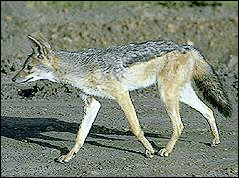

In [ ]:
import urllib.request

with (
    urllib.request.urlopen("https://httpbin.org/image/jpeg") as r,
    open("./test.jpg", "wb") as f,
):
    f.write(r.read())

# IPython で画像を表示
from IPython.display import Image, display_jpeg
display_jpeg(Image('test.jpg'))

`GET` リクエストでパラメータを渡すには、URL のクエリ文字列を使う。`urllib.parse.urlencode()` を使うと、辞書やタプルのリストから安全にクエリ文字列を組み立てることができる。

次のコードは、httpbin.org が提供する Web API において、`GET` リクエストをパラメータ付きで発行する例である。リクエスト時のクエリ文字列がレスポンスボディの JSON で `args` キーに格納されて返される。

In [ ]:
from urllib.parse import urlencode
import urllib.request
import json

endpoint = "https://httpbin.org/get"
params = {"name": "Taro", "age": 20}
url = urllib.request.Request('{}?{}'.format(endpoint, urllib.parse.urlencode(params)))
with urllib.request.urlopen(url) as res:
    body = res.read().decode("utf-8")

# レスポンスをJSONとしてパース
d = json.loads(body)
print(d["args"])

{'age': '20', 'name': 'Taro'}


`urllib.request.urlopen()` 関数を、第 1 引数に URL の文字列、第 2 引数にパラメータとなるデータを渡して呼び出したときは、内部生成される `urllib.request.Request` インスタンスの `method` 属性は `None` となり `get_method()` メソッドは `'POST'` を返す。デフォルトでは `'Content-Type: application/x-www-form-urlencoded'` ヘッダーが設定されるので、フォームデータを送信する `POST` リクエストは、URL の文字列 `url` とパラメータ `data` を渡して `urllib.request.urlopen(url, data)` と呼び出せばよい。

次のコードは、httpbin.org が提供する Web API において、`POST` リクエストを発行する例である。リクエスト時に送ったフォームデータがレスポンスボディの JSON で `form` キーに格納されて返される。

In [ ]:
import urllib.request
import json

# 送信するデータ
payload = {"name": "Taro", "age": 20}

# フォームデータに変換(バイト列)
data = urllib.parse.urlencode(payload).encode("utf-8")

url = "https://httpbin.org/post"
with urllib.request.urlopen(url, data) as res:
    body = res.read().decode("utf-8")

# レスポンスをJSONとしてパース
d = json.loads(body)
print(d["form"])

{'age': '20', 'name': 'Taro'}


リクエスト時にカスタムヘッダーを設定するには、`urllib.request.Request` のコンストラクタに `headers` 引数を渡す必要がある。したがって、`urllib.request.Request` インスタンスを直接生成して `urllib.request.urlopen()` に渡すことになる。

次のコードは、httpbin.org が提供する Web API において、`POST` リクエストをカスタムヘッダー付きで発行する例である。リクエスト時に送った JSON データがレスポンスボディの JSON で `data` キーに格納されて返される。

In [ ]:
import urllib.request
import json

# 送信するデータ
payload = {"name": "Taro", "age": 20}

# JSONに変換
data = json.dumps(payload).encode("utf-8")

# カスタムヘッダー
headers = {"Content-Type": "application/json"}

# リクエスト作成
url = "https://httpbin.org/post"
req = urllib.request.Request(url, data=data, headers=headers, method="POST")

# リクエスト送信
with urllib.request.urlopen(req) as res:
    body = res.read().decode("utf-8")

# レスポンスをJSONとしてパース
d = json.loads(body)
print(d["data"])

{"name": "Taro", "age": 20}


### 例外

`urllib.request.urlopen()` 関数は、エラーとなったとき、次の 2 種類の例外を送出する。

  * `urllib.error.URLError`: HTTP 通信に失敗したとき
  * `urllib.error.HTTPError`: HTTP ステータスコードが 4xx または 5xx だったとき

`urllib.error.HTTPError` は `urllib.error.URLError` のサブクラスであることに注意する。両方を捕捉したい場合は、`urllib.error.HTTPError` の except 節を先に書く必要がある。主な属性は次のとおり。

| 属性 | 意味 |
|---|---|
| `reason` | リーズンフレーズ（文字列） |
| `code` | （`HTTPError` のみ） HTTP ステータスコード（整数） |

httpbin.org の `/status/{ステータスコード}` エンドポイントは、指定したステータスコードのレスポンスを返す。これを利用して例外処理の動作確認ができる。

In [ ]:
import urllib.request

try:
    with urllib.request.urlopen("https://httpbin.org/status/403") as res:
        body = res.read(98).decode("utf-8")  # 先頭98バイトまで読み込む
except urllib.error.HTTPError as err:
    print(err.code, err.reason)
except urllib.error.URLError as err:
    print(err.reason)
else:
    print(body)

403 FORBIDDEN


`urllib.request.urlopen()` 関数は、`timeout` 引数を指定すると、設定した時間以内にレスポンスがない場合に `TimeoutError` 例外を送出する。接続先のサーバーが応答しない、またはネットワークに問題がある場合に、プログラムが無期限にブロックされることを防ぐため、`timeout` 引数を指定したほうがよい。

httpbin.org の `/delay/{秒数}` エンドポイントは、指定した秒数の遅延レスポンスをしてくれる。これを利用して例外処理の動作確認ができる。

In [ ]:
import urllib.request

try:
    with urllib.request.urlopen("https://httpbin.org//delay/2", timeout=3) as res:
        body = res.read(98).decode("utf-8")  # 先頭98バイトまで読み込む
except urllib.error.HTTPError as err:
    print(err.code, err.reason)
except urllib.error.URLError as err:
    print(err.reason)
except TimeoutError as err:
    print(f"{type(err).__name__}: {err}")
else:
    print(body)

TimeoutError: The read operation timed out


### Cookie を使ったセッション管理

`urllib.request.urlopen()` 関数は、Cookie を扱うことができない。`urllib.request` モジュールを使ってセッション維持を可能とする処理を実装するには、低レベルのクラスのインスタンスを使用する必要がある。

`urllib.request.OpenerDirector` クラスは、複数の「URL ハンドラ」をディレクター（監督）のように統括し、URL を開くというリクエストの処理フローを制御する。各「URL ハンドラ」は、特定のプロトコル（HTTP、FTP など）、認証、プロキシ、リダイレクト、クッキーなどの特定の側面を処理する責任を持つ。

主な属性:

| 属性 | 意味 |
|---|---|
| `OpenerDirector.addheaders` | 追加のヘッダーフィールドをタプル `(header_name, header_value)` のリストで指定する |

主なメソッド:

| メソッド | 機能 | 戻り値 |
|---|---|---|
| `OpenerDirector.open(url, data=None[, timeout])` | URL ハンドラを連鎖的に呼び出して URL を開く。引数、戻り値、および送出される<br /><br />例外は `urllib.request.urlopen()` 関数と同じ | `HTTPResponse` |

`urllib.request.OpenerDirector` クラスは、内部で URL ハンドラをどのように連鎖させるか、またどのようにエラーをリカバリするかを管理しており、それによって `open()` メソッドのふるまいを決めている。基本的な URL ハンドラの連鎖設定を保持する `urllib.request.OpenerDirector` オブジェクトは、次の関数を使用して取得することができる。

``` python
urllib.request.build_opener([handler, ...])
```

デフォルトでこの関数が返す `urllib.request.OpenerDirector` オブジェクトは、以下の全ての URL ハンドラの連鎖設定を保持する。

| URL ハンドラ | 機能 |
|---|---|
| `urllib.request.ProxyHandler(proxies=None)` | プロキシを通過してリクエストを送らせる |
| `urllib.request.UnknownHandler` | 未知のプロトコルの URL を開く |
| `urllib.request.HTTPHandler` | HTTP の URL を開く |
| `urllib.request.HTTPDefaultErrorHandler` | HTTP エラーレスポンスのデフォルトハンドラー |
| `urllib.request.HTTPRedirectHandler` | リダイレクションを扱う |
| `urllib.request.FTPHandler` | FTP の URL を開く |
| `urllib.request.FileHandler` | ローカルファイルを開く |
| `urllib.request.HTTPErrorProcessor` | HTTP エラーレスポンスの処理をする |
| `urllib.request.DataHandler` | [data URL](https://developer.mozilla.org/ja/docs/Web/URI/Reference/Schemes/data) を開く |
| `urllib.request.HTTPSHandler(debuglevel=0, context=None, check_hostname=None)` | HTTPS で URL を開く |

`urllib.request.build_opener()` 関数の呼び出しの際に URL ハンドラを渡す場合、もしそのクラスが上記に含まれるのであればデフォルトの連鎖設定にある URL ハンドラが置き換えられ、そうでなければデフォルトの連鎖設定に追加される。

実際、`urllib.request.urlopen()` 関数は、内部で `urllib.request.build_opener()` 関数を呼び出しており、`context` 引数が渡された場合にはその関数に `urllib.request.HTTPSHandler(context=context)` を渡すことで、デフォルトの連鎖設定の中の `urllib.request.HTTPSHandler` を置き換えている。関連するコードを抜粋すると、次のようになっている。

``` python
def urlopen(url, data=None, timeout=socket._GLOBAL_DEFAULT_TIMEOUT, *, context=None):
    if context:
        https_handler = HTTPSHandler(context=context)
        opener = build_opener(https_handler)
    return opener.open(url, data, timeout)
```

以下の URL ハンドラは、デフォルトの連鎖設定に含まれていない。

| URL ハンドラ | 機能 |
|---|---|
| `urllib.request.HTTPCookieProcessor(cookiejar=None)` | サーバーから受け取った `Set-Cookie` ヘッダーを解析し、Cookie を保持する。次のリクエストを送信<br /><br />する際に、保持する Cookie の中から適切なものを選択し、`Cookie` ヘッダーとしてリクエストに追加<br /><br />する。これによりセッションが維持される |

したがって、Cookie を使用してセッション維持を可能とするには、`urllib.request.HTTPCookieProcessor` のインスタンスを、`urllib.request.build_opener()` 関数に渡せばよい（ハンドラが連鎖設定に追加され、`open()` メソッド使用時に呼び出されるようになる）。

次のサイトは、Heroku が提供するシンプルな認証のテストページで、ユーザー名とパスワードが `'tomsmith'`と `'SuperSecretPassword!'` に決まっている。ログインに成功すると、ログイン後のページにリダイレクトされるため、ログインの流れ全体をテストするのに適している。

  * https://the-internet.herokuapp.com/login

このテストページのフォームは次のようになっている。

``` html
<form name="login" id="login" action="/authenticate" method="post" >
   <div class="row">
    <div class="large-6 small-12 columns">
      <label for="username">Username</label>
      <input type="text" name="username" id="username" />
    </div>
  </div>
  <div class="row">
    <div class="large-6 small-12 columns">
      <label for="password">Password</label>
      <input type="password" name="password" id="password" />
    </div>
  </div>
    <button class="radius" type="submit"><i class="fa fa-2x fa-sign-in"> Login</i></button>
</form>
```

したがって、認証をパスするには `https://the-internet.herokuapp.com/authenticate` に対し `POST` リクエストでフォームデータを送信すればよい。コードは以下のようになる。

In [ ]:
import urllib.request
import urllib.parse
import html5lib

# Cookie を扱うハンドラを作成
cookie_handler = urllib.request.HTTPCookieProcessor()

# opener を構築（User-Agent も設定可能）
opener = urllib.request.build_opener(cookie_handler)
opener.addheaders = [('User-Agent', 'Mozilla/5.0 (compatible; Python urllib)')]

# ログインデータの準備
form_data = {
    'username': 'tomsmith',
    'password': 'SuperSecretPassword!'
}
encoded_data = urllib.parse.urlencode(form_data).encode('utf-8')

# ログインリクエスト（POST）
login_url = "https://the-internet.herokuapp.com/authenticate"
login_request = urllib.request.Request(login_url, data=encoded_data, method='POST')
login_response = opener.open(login_request)

# ログイン後のページへ遷移
assert login_response.url == "https://the-internet.herokuapp.com/secure"

# セキュアページの内容
secure_response = opener.open(login_response.url)
secure_content = secure_response.read().decode('utf-8')

# html5lib でセキュアページに表示されるメッセージを取得
doc = html5lib.parse(secure_content, namespaceHTMLElements=False)
messages = doc.find('.//h4')
print("メッセージ:", messages.text.strip())

メッセージ: Welcome to the Secure Area. When you are done click logout below.


http.cookiejar
--------------

標準ライブラリの `http.cookiejar` モジュールは、HTTP クライアント用の Cookie 処理（保存、取得、管理）を自動化するクラスを定義する。

  * `http.cookiejar.CookieJar`:  
Cookie をメモリ内に保存するための基本クラス。プログラムを終了すると Cookie は消える。
  * `http.cookiejar.LWPCookieJar`:  
Cookie をファイルに保存・読み込みするための派生クラス。

これらのクラスは、Cookie 情報を `http.cookiejar.Cookie` オブジェクトとして保持する。`http.cookiejar.Cookie` をユーザーが自分でインスタンス化することは想定されていない。その主な属性・メソッドは次のとおり。

| 属性 | 意味 |
|---|---|
| `Cookie.domain` | Cookie のドメイン（文字列） |
| `Cookie.path` | Cookie のパス名（文字列、例: `'/acme/rocket_launchers'`） |
| `Cookie.name` | Cookie の名前（文字列） |
| `Cookie.value` | Cookie の値（文字列）、あるいは `None` |

| メソッド | 機能 | 戻り値 |
|---|---|---|
| `Cookie.is_expired(now=None)` | サーバーが要求する Cookie の有効期限を過ぎていれば `True` を返す。`now` がエポック秒で指定されている場合、<br /><br />特定の時刻で期限切れかどうかを判定する | `bool` |

`urllib.request.HTTPCookieProcessor` は、コンストラクタの引数を省略した場合、内部で新しい `http.cookiejar.CookieJar` オブジェクトを生成して Cookie 処理に利用する。このオブジェクトは `cookiejar` 属性から参照できる。また、コンストラクタに `http.cookiejar.CookieJar` の派生クラスのインスタンスを渡した場合は、それがそのまま利用され、同様に `cookiejar` 属性から参照できる。

![](https://www.plantuml.com/plantuml/png/ZP3DIiKm48NtynHTgf0ym4NaWYv41Biek9Gn6MWqFt4c4K5zTqiBNQMjs_dcOywPinJaKeC7ur6ag-ozUzLC7vMawATCaVZECPcIkFi6j7OajCG2QM8Nb_3RDk-7eRzDwTrHpycGoAoRUVA6l6fZALclOxqe3yXj_FZS7smiU3fbKq0N8MCP8M8W-4HV2Poyq5TsJ7REljzNtVoZ5Xold4vhm4vTRNVU0bEGjhHjNFyejVkzDZiuTwPeQ_1_)

`http.cookiejar.CookieJar` のコンストラクタは次のとおり。

``` python
http.cookiejar.CookieJar(policy=None)
```

省略可能な引数 `policy` は、Cookie ポリシー（Cookie を受け入れるか拒否するか、どの Cookie を送信するか）を指定するための引数である。しかし、これを明示的に指定する必要があるのは、一般的な Web ブラウザのデフォルト設定とは異なる Cookie 処理を行いたい場合（特定のサイトの Cookie をブロックするなど）に限られる。指定する場合は、`http.cookiejar.DefaultCookiePolicy` クラスのカスタマイズされたインスタンス、またはこのクラスを継承してメソッドをオーバーライドするクラスのインスタンスを使用する。詳しくは、[公式ドキュメント](https://docs.python.org/ja/3/library/http.cookiejar.html#defaultcookiepolicy-objects)を参照。

`http.cookiejar.CookieJar` クラスは、HTTP クライアント用に、リクエストに `Cookie` ヘッダーを追加するメソッド、レスポンスから Cookie を取り出し保存するメソッドなどをサポートする。これらのメソッドは、HTTP クライアントの開発者が使用するものである。

HTTP クライアントのユーザーが利用できるのは、イテレーターの機能である。`http.cookiejar.CookieJar` オブジェクトは、保持している `http.cookiejar.Cookie` オブジェクトを 1 つずつ取り出すための、イテレータープロトコルをサポートしている。

次のコードは、Heroku の認証テストページを利用した既出のコードを改変して、保持する Cookie 情報を表示する例である。

In [ ]:
import urllib.request
import urllib.parse

# Cookie を扱うハンドラを作成
cookie_handler = urllib.request.HTTPCookieProcessor()

# opener を構築
opener = urllib.request.build_opener(cookie_handler)

# ログインデータの準備
form_data = {
    'username': 'tomsmith',
    'password': 'SuperSecretPassword!'
}
encoded_data = urllib.parse.urlencode(form_data).encode('utf-8')

# ログインリクエスト（POST）
login_url = "https://the-internet.herokuapp.com/authenticate"
login_request = urllib.request.Request(login_url, data=encoded_data, method='POST')
login_response = opener.open(login_request)

# Cookie 情報を確認
for cookie in cookie_handler.cookiejar:
    print(f"domain: {cookie.domain}")
    print(f"path: {cookie.path}")
    print(f"name: {cookie.name}")
    print(f"value: {cookie.value}")

domain: the-internet.herokuapp.com
path: /
name: rack.session
value: BAh7CkkiD3Nlc3Npb25faWQGOgZFVEkiRTQ0NTdhNWQ4MDk0OWMxZmZjODFh%0AZjBiZjg0ZmJmYzA0M2QzZDBmYjcxMTc2MjM1ZWUwYmYzY2Q1Zjc3YzIyNDcG%0AOwBGSSIJY3NyZgY7AEZJIiU0MzdmNjNmYzllNzIxNjc3ZmYzY2YyZjM0ZDhj%0AMjI4ZgY7AEZJIg10cmFja2luZwY7AEZ7B0kiFEhUVFBfVVNFUl9BR0VOVAY7%0AAFRJIi01MWZlMTY3OGZiN2E2ODc0ZWRlMGMzY2I2MDNiOWY3NWQyMzczNDNk%0ABjsARkkiGUhUVFBfQUNDRVBUX0xBTkdVQUdFBjsAVEkiLWRhMzlhM2VlNWU2%0AYjRiMGQzMjU1YmZlZjk1NjAxODkwYWZkODA3MDkGOwBGSSINdXNlcm5hbWUG%0AOwBGSSINdG9tc21pdGgGOwBUSSIKZmxhc2gGOwBGewA%3D%0A--4e8c4457fdd12b294df607731a2246470c3f8524


`http.cookiejar.LWPCookieJar` のコンストラクタは、次のように拡張されている。

``` python
http.cookiejar.LWPCookieJar(filename=None, delayload=None, policy=None)
```

`filename` は Cookie を保存するデフォルトのファイルのパスを指定するためのオプションであり、指定された値はインスタンスの `filename` 属性に保存される。`delayload` は使用されていない。

`http.cookiejar.LWPCookieJar` クラスは、`http.cookiejar.CookieJar` の機能に加えて以下のメソッドもサポートする。

``` python
LWPCookieJar.save(filename=None, ignore_discard=False, ignore_expires=False)
```

Cookie をファイルに保存する。

| 引数 | 意味 |
|---|---|
| `filename` | Cookie を保存するファイルのパス。`None`（デフォルト）の場合は、`filename` 属性の値が使用される。<br /><br />`filename` 属性 も `None` の場合は `ValueError` 例外が発生する |
| `ignore_discard` | `True` の場合、`Expires` も `Max-Age` も指定されない Cookie でも保存する |
| `ignore_expires` | `True` の場合、期限の切れた Cookie でも保存する |

``` python
LWPCookieJar.load(filename=None, ignore_discard=False, ignore_expires=False)
```

ファイルから Cookie を読み込む。それまでの Cookie は新しいものに上書きされない限り残る。

引数の意味は `save()` と同じ。

ファイルから Cookie を読み込むのに失敗した場合、`http.cookiejar.LoadError` 例外が発生する。`http.cookiejar.LoadError` は `OSError` のサブクラスである。

次のコードは、上のコードを改変して、Cookie をファイルに保存し、ファイルを読み込む例である（最後にファイルの内容をシェルコマンドで表示している）。

In [ ]:
import urllib.request
import urllib.parse
from http.cookiejar import LWPCookieJar

# Cookie を扱うハンドラを作成（LWPCookieJar を使用）
cookie_handler = urllib.request.HTTPCookieProcessor(LWPCookieJar())

# opener を構築
opener = urllib.request.build_opener(cookie_handler)

# ログインデータの準備
form_data = {
    'username': 'tomsmith',
    'password': 'SuperSecretPassword!'
}
encoded_data = urllib.parse.urlencode(form_data).encode('utf-8')

# ログインリクエスト（POST）
login_url = "https://the-internet.herokuapp.com/authenticate"
login_request = urllib.request.Request(login_url, data=encoded_data, method='POST')
login_response = opener.open(login_request)

# Cookie 情報をファイルに保存
cookie_handler.cookiejar.save("lwpcookies.txt", ignore_discard=True, ignore_expires=True)

# 新たに LWPCookieJar オブジェクトを作成してファイルを読み込む
cookie_jar = LWPCookieJar()
cookie_jar.load("lwpcookies.txt", ignore_discard=True, ignore_expires=True)

# Cookie 情報を確認
for cookie in cookie_jar:
    print(f"domain: {cookie.domain}")
    print(f"path: {cookie.path}")
    print(f"name: {cookie.name}")
    print(f"value: {cookie.value}")

!cat lwpcookies.txt

domain: the-internet.herokuapp.com
path: /
name: rack.session
value: BAh7CkkiD3Nlc3Npb25faWQGOgZFVEkiRTJmMzRhNTExMmZiZDMwNDdmZjM1%0ANzA4NzA5NzYxODNmNzU3ZWE1ZDEyNmVjOTAwYWMzMTY3ZThlOTIwZTVhNDIG%0AOwBGSSIJY3NyZgY7AEZJIiUwYjQ0MmNhMmJmZjczMzM2ODNkNGE0MzE4NDk3%0ANzljYQY7AEZJIg10cmFja2luZwY7AEZ7B0kiFEhUVFBfVVNFUl9BR0VOVAY7%0AAFRJIi01MWZlMTY3OGZiN2E2ODc0ZWRlMGMzY2I2MDNiOWY3NWQyMzczNDNk%0ABjsARkkiGUhUVFBfQUNDRVBUX0xBTkdVQUdFBjsAVEkiLWRhMzlhM2VlNWU2%0AYjRiMGQzMjU1YmZlZjk1NjAxODkwYWZkODA3MDkGOwBGSSINdXNlcm5hbWUG%0AOwBGSSINdG9tc21pdGgGOwBUSSIKZmxhc2gGOwBGewA%3D%0A--150d4fc504d084a06482743931fd65eaa41d05cd
#LWP-Cookies-2.0
Set-Cookie3: rack.session="BAh7CkkiD3Nlc3Npb25faWQGOgZFVEkiRTJmMzRhNTExMmZiZDMwNDdmZjM1%0ANzA4NzA5NzYxODNmNzU3ZWE1ZDEyNmVjOTAwYWMzMTY3ZThlOTIwZTVhNDIG%0AOwBGSSIJY3NyZgY7AEZJIiUwYjQ0MmNhMmJmZjczMzM2ODNkNGE0MzE4NDk3%0ANzljYQY7AEZJIg10cmFja2luZwY7AEZ7B0kiFEhUVFBfVVNFUl9BR0VOVAY7%0AAFRJIi01MWZlMTY3OGZiN2E2ODc0ZWRlMGMzY2I2MDNiOWY3NWQyMzczNDNk%0ABjsARkkiGUhUVFBfQUNDRVBUX0xBTkdVQUdFBjs

Requests
--------

Python では、 HTTP/1.1 ベースのサードパーティ製 HTTP クライアントライブラリとして、次のようなものがある。

  * [urllib3](https://urllib3.readthedocs.io/en/stable/):  
  標準ライブラリの `urllib.request` モジュールに不足している接続管理と低レベルの通信機能を提供する。ライセンスは MIT License。
  * [Requests](https://requests.readthedocs.io/en/latest/):  
  `urllib3` の上に構築された高水準な HTTP クライアントインターフェースを提供する。ライセンスは Apache license 2.0。

Python の[公式ドキュメント](https://docs.python.org/ja/3/library/urllib.request.html)によれば、標準ライブラリの `urllib.request` モジュールよりも、 Requests を使用することが推奨されている。

Requests のインストール方法は次のとおり（依存パッケージとして `urllib3` もインストールされる）。

``` shell
pip install requests
```

### Response

`requests.Response` は、 HTTP レスポンスを表すクラスである。 `requests.Response` をユーザーが自分でインスタンス化することは想定されていない。

`requests.Response` の主な属性は次のとおり。

| 属性 | 意味 |
|---|---|
| `status_code` | レスポンスの HTTP ステータスコード（整数） |
| `reason` | レスポンスのリーズンフレーズ（文字列） |
| `ok` | （読み出し専用）レスポンスの HTTP ステータスコードが 400 より小さいならば `True`、そうでない場合は `False` |
| `headers` | 大文字と小文字を区別しないレスポンスヘッダーの辞書。例えば、`headers['content-encoding']` は、`'Content-Encoding'` の値を返す |
| `cookies` | レスポンスに含まれる Cookie 情報を保持する辞書ライクなオブジェクト（`requests.cookies.RequestsCookieJar` オブジェクト） |
| `encoding` | エンコーディング |
| `text` | （読み出し専用）`encoding` によって文字列にエンコードされたレスポンスボディ |
| `apparent_encoding` | （読み出し専用）レスポンスボディで使われていると推測されるエンコーディング。`encoding` をこの `apparent_encoding` の値に指定する<br /><br />と、`text` の文字化けが解消されることがある |
| `content` | （読み出し専用）バイト列のままのレスポンスボディ |
| `url` | 実際にレスポンスを返してきたサーバーの URL（リダイレクトが発生した場合はリダイレクト後の URL となる） |
| `request` | レスポンスを生成する元となったリクエストの情報を保持するオブジェクト。`method`, `url`, `headers`, `body` などの属性にアクセスできる |
| `history` | リダイレクトが発生した場合、その途中で返されたレスポンスが順番に格納される `Response` オブジェクトのリスト（リダイレクトがなけれ<br /><br />ば空リスト `[]`） |

`cookies` 属性で参照されるオブジェクトは、 `requests.cookies.RequestsCookieJar` のインスタンスである。このクラスの特徴は次のとおり。

  * `http.cookiejar.CookieJar` のサブクラスであり、イテラブルとして使用する場合、個々の Cookie 情報を保持する `http.cookiejar.Cookie` オブジェクトを 1 つずつ取り出すことができる。
  * Cookie 名をキーとする辞書と同じように扱うことができる。 `jar["cookie_name"]` のような添字表記による参照はもちろん、`get()`, `set()`, `update()`, `items()`, `keys()`, `values()` なども使える。また、 `get()`, `set()` は、オプションとして `domain` と `path` を受け付け、それぞれ Cookie のドメイン、パス名を指定することもできる。

`requests.Response` の主なメソッドは次のとおり。

| メソッド | 機能 | 戻り値 |
|---|---|---|
| `raise_for_status()` | レスポンスの HTTP ステータスコードが 400 番台や 500 番台だった場合に、例外を送出す<br /><br />る | `None` |
| `json(**kwargs)` | レスポンスボディを JSON 形式として解析し、辞書に変換して返す。このメソッドのキーワー<br /><br />ド引数は、`json.loads()` のキーワード専用引数に渡される | `dict` |
| `iter_content(chunk_size=1, decode_unicode=False)` | ストリーミング時にレスポンスボディを `chunk_size` バイトごとに返すイテレーターを返す。<br /><br />`decode_unicode` が `True` の場合、サーバーのエンコーディングに従ってバイト列を文字<br /><br />列にデコードする | `bytes`<br /><br />or `str` |
| `iter_lines(chunk_size=512, decode_unicode=False,`<br /><br />` delimiter=None)` | ストリーミング時にレスポンスボディを 1 行ずつ返すイテレーターを返す。`chunk_size` と<br /><br /> `decode_unicode` は内部で使う `iter_content()` に渡される。`delimiter` に行の区切り<br /><br />文字（バイト列）を指定できる | `bytes`<br /><br />or `str` |

### Session

`requests.Session` クラスは、 Requests が提供する HTTP クライアントインターフェースの基盤となるクラスである。主な特徴は次のとおり。

  * **タイムアウト指定**:  
  サーバーとの接続が確立するまでの待ち時間と、サーバーがレスポンスを返すまでの待ち時間を別々に設定できる。
  * **共通設定**:  
  セッション内の全リクエストに適用されるヘッダーや認証情報などを設定しておける。
  * **Cookie の自動処理**:  
  ログイン後のセッション ID などを Cookie 方式で保持して、次のリクエストで自動で送信する。

`requests.Session` のコンストラクタは次のとおり（パラメータはない）。

``` python
requests.Session()
```

`requests.Session` の属性は、セッション内の全リクエストに適用される共通設定に使用される。主な属性は次のとおり。

| 属性 | 意味 | 設定例 |
|---|---|---|
| `params` | セッション内の全リクエストに共通で付与される URL パラメータを指定する辞<br /><br />書。URL エンコードは内部で自動的に行われる。デフォルト値は空の辞書 `{}` | `s.params={'lang':'ja'}` |
| `headers` | 大文字と小文字を区別しないヘッダーフィールドの辞書。セッションの間、共通<br /><br />して使用されるヘッダーフィールドを指定する | `s.headers.update({'User-Agent':'my-app/1.0'})` |
| `cookies` | セッション中の Cookie 情報を保持するための `http.cookiejar.CookieJar` <br /><br />互換オブジェクト。デフォルトは中身が空の `RequestsCookieJar` オブジェクト | |
| `auth` | タプルの場合、セッション内の認証情報を指定する。デフォルト値は `None` | `s.auth=('username','password')` |
| `proxies` | セッション内の全リクエストで使うプロキシサーバーの設定を表す辞書。デフォ<br /><br />ルト値は空の辞書 `{}` | `s.proxies={'http':'http://proxy.example.com:8080'}` |
| `max_redirects` | リダイレクトの上限回数。デフォルト値は 30 | `s.max_redirects=10` |
| `stream` | `False`（デフォルト）の場合、レスポンスボディの全体を即時に読み込む。`True`<br /><br /> の場合、`requests.Response` の `iter_content()`、`iter_lines()` メソッド<br /><br />を使って順次読み出す（ストリーミング） | `s.stream=True` |
| `verify`<br /><br />`cert` | HTTPS 通信をする際に、デフォルトの高いセキュリティレベルの設定を変更す<br /><br />るために使用される。通常、これらを指定する必要はない | |

`headers` 属性のデフォルト値は、以下のコードで確認できる:

In [ ]:
import requests
s = requests.Session()
print(s.headers)

{'User-Agent': 'python-requests/2.32.4', 'Accept-Encoding': 'gzip, deflate, br, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}


Requests はプロキシサーバーに対応しており、プロキシサーバーを指定する場合は次のようにする。

``` python
proxies = {
   "http": "http://ユーザー名:パスワード@アサインされたプロキシのIPアドレス:ポート番号",
   "https": "http://ユーザー名:パスワード@アサインされたプロキシのIPアドレス:ポート番号"
}
s = requests.Session()
s.proxies = proxies
```

以下は、 `requests.Session` の主なメソッドである。

``` python
Session.request(method, url, params=None, data=None, headers=None, cookies=None, files=None, auth=None, timeout=None, allow_redirects=True,
                proxies=None, hooks=None, stream=None, verify=None, cert=None, json=None)
```

このメソッドは、HTTP リクエストを送信して `requests.Response` オブジェクトを返す。

属性名と同名の引数の指定は、このリクエスト限定で属性値より優先される。その他の引数で主なものは以下の通り。

| 引数 | 意味 |
|---|---|
| `method` | （必須）`'GET'`、`'POST'` などの HTTP メソッド（文字列） |
| `url` | （必須）リクエスト先 URL（文字列） |
| `data` | （オプション）リクエストボディとして送信するフォームデータまたは生データを指定する。指定できる型は次のとおり<br /><br />・辞書またはタプルのリスト: `application/x-www-form-urlencoded` 形式にエンコードされる<br /><br />・バイト列: 生のバイナリとして送信される<br /><br />・文字列: 生の文字列として送信される（utf-8 エンコードは自動ではされない）<br /><br />・ファイルオブジェクト: 読み取られた中身が生のバイナリとして送信される（`Content-Type` は自動では付かない）<br /><br />・バイト列のイテレーターやジェネレーター: チャンクごとにストリーミング送信される |
| `files` | （オプション）アップロードするファイルを辞書で指定する。辞書の形式は、`'name': file-like-objects` または `'name': tuple` とする。<br /><br />・`'name'` は、`POST` メソッドで送信する場合には、フォームの `<input type="file">` の `name` 属性の値とする<br /><br />・タプルは、`('filename', fileobj, 'content_type')` とする 3 要素タプル。`'content_type'` は、指定されたファイルの MIME タイプ<br /><br />`Content-Type` ヘッダーが自動的に `multipart/form-data` に設定される。`Content-Length` ヘッダーも自動で設定される |
| `timeout` | （オプション）リクエストのタイムアウト時間。サーバーとの接続が確立するまでの待ち時間と、サーバーがレスポンスを返すまでの待ち時間<br /><br />をそれぞれタプルで `timeout=(3.0, 5.0)` のように指定するか、あるいは `float` 型の値を 1 つ与えて両方に同じ時間を指定する |
| `allow_redirects` | （オプション）`True`（デフォルト）の場合、リダイレクトを許可し、転送後の情報を取得する。そうでない場合、転送されたという結果のみが得<br /><br />られる |
| `json` | （オプション）JSON シリアライズ可能な Python オブジェクトを指定すると、`json.dumps()` で JSON 形式に変換されリクエストボディとし<br /><br />て送信される。さらにヘッダーに `Content-Type: application/json` を自動追加する |

`request()` メソッドは、デフォルトではリクエストのタイムアウト時間が設定されない。つまり、明示的に `timeout` 引数を指定しない場合、リクエストはサーバーからの応答を「無期限に待ち続ける」挙動になる。常に `timeout` を明示的に指定することが望ましい。

``` python
Session.get(url, **kwargs)
Session.post(url, data=None, json=None, **kwargs)
Session.head(url, **kwargs)
Session.put(url, data=None, **kwargs)
Session.delete(url, **kwargs)
Session.options(url, **kwargs)
Session.patch(url, data=None, **kwargs)
```

これらは各 HTTP メソッドに対応する専用メソッドであり、内部的には `request()` メソッドに該当の HTTP メソッド名を指定して呼び出すだけの簡易的なラッパーとして実装されている。キーワード引数はそのまま `request()` メソッドに渡される。

``` python
Session.close()
```

`requests.Session` オブジェクトが内部で管理している接続プール内のすべての接続を閉じ、関連するリソースを解放する。

``` python
Session.__enter__()
Session.__exit__(*args)
```

これらは、 `requests.Session` オブジェクトを with 構文でコンテキストマネージャーとして利用するためのメソッドである。 `__enter__()` メソッドはオブジェクト自身を返し、 `__exit__()` メソッドは `close()` メソッドを呼び出して接続を確実に閉じる。

次のコードは、Heroku が提供するシンプルな認証テストページ（https://the-internet.herokuapp.com/login ）において、 `requests.Session` を使ってセッションを管理する例である。標準ライブラリの `urllib.request` を使用する場合より簡単に書けることがわかる。

In [ ]:
import requests
import html5lib

# ログインデータの準備
form_data = {
    'username': 'tomsmith',
    'password': 'SuperSecretPassword!'
}

login_url = "https://the-internet.herokuapp.com/authenticate"
with requests.Session() as session:
    # 共通ヘッダーを設定
    session.headers.update({'User-Agent': 'my-app/1.0'})

    login_response = session.post(login_url, params=form_data)

    # ログイン後のページへ遷移
    assert login_response.url == "https://the-internet.herokuapp.com/secure"

    # セキュアページの内容
    secure_response = session.get(login_response.url)

    # html5lib でセキュアページに表示されるメッセージを取得
    doc = html5lib.parse(secure_response.text, namespaceHTMLElements=False)
    messages = doc.find('.//h4')
    print("メッセージ:", messages.text.strip())

メッセージ: Welcome to the Secure Area. When you are done click logout below.


### 接続プールとリトライ

`requests.Session` は、 HTTP 通信の接続方法を「アダプター」クラスに依存している。デフォルトで使用される `requests.adapters.HTTPAdapter` は、 `urllib3` が提供する以下の接続機能を利用できるアダプターである。

  * **接続プール**:  
  HTTP/1.1 の Keep-Alive 機能を利用して、接続を使い終わっても閉じずにプール（集合）に保持しておき、同じホストへの後続リクエストで再利用できる。
  * **リトライ**:  
  接続や HTTP 通信でエラーが発生した場合に自動的に同じリクエストを再送する。

``` python
requests.adapters.HTTPAdapter(pool_connections=10, pool_maxsize=10, max_retries=0, pool_block=False)
```

| 引数 | 意味 |
|---|---|
| `pool_connections` | 作成できる接続プールの数（異なるホストごとにプールが作られる）。デフォルトは 10 |
| `pool_maxsize` | 各プールで保持できる接続数。デフォルトは 10 |
| `max_retries` | 自動的にリトライする回数の上限、または `urllib3.util.retry.Retry` オブジェクト。デフォルトは 0 （リトライなし） |
| `pool_block` | `pool_maxsize` を使い切っているときの挙動。`True` の場合、空きが出るまで待機。`False`（デフォルト）の場合、即座に例外を送出 |

`requests.Session` が使用するアダプターは、次のメソッドで登録できる。

``` python
Session.mount(prefix, adapter)
```

| 引数 | 意味 |
|---|---|
| `prefix` | 適用対象となる URL スキームやドメインを指定する（例：`'http://'`, `'https://'`, `'https://example.com/'`） |
| `adapter` | アダプターを指定する |

`requests.Session` クラスは、イニシャライザー `__init__()` の中で、以下のようにデフォルトのアダプターを登録している。

``` python
self.mount("https://", HTTPAdapter())
self.mount("http://", HTTPAdapter())
```

したがって、デフォルトでは接続プールが使用されるが、リトライは行わない。

HTTP リトライ回数は、サーバー負荷を避けるため、一般的に 2 〜 3 回が推奨される。また、リトライ間隔を指数的に延ばす**指数バックオフ**（Exponential Backoff）を用いるべきであるとされる。`requests.adapters.HTTPAdapter` のコンストラクタ引数 `max_retries` には `urllib3.util.retry.Retry` オブジェクトを指定することもできて、これにより指数バックオフを設定できる。

`urllib3.util.retry.Retry` の主なコンストラクタ引数は次のとおり。

| 引数 | 意味 |
|---|---|
| `total` | 全体の最大リトライ回数。デフォルトは 10 |
| `backoff_factor` | リトライ間隔計算の係数（`float`） |
| `status_forcelist` | リトライ対象のステータスコード（整数のリスト） |
| `allowed_methods` | リトライ対象の HTTP メソッド（文字列の集合）。デフォルトは `{"HEAD", "GET", "PUT", "DELETE", "OPTIONS", "TRACE"}` |

`max_retries` に `urllib3.util.retry.Retry` オブジェクトを指定した場合は、最大リトライ回数を超過すると必ず例外が発生する。`max_retries` にリトライ回数を指定した場合は、 `raise_for_status()` が HTTP ステータスコードに基づいて例外を送出することがあるだけである。

次のコードは、リトライを設定する例である。 httpbin.org はパス `/status/<ステータスコード>` を指定する GET リクエストに対して、そのステータスコードを含む HTTP レスポンスを返す。これを利用して httpbin.org からステータスコード 429 のレスポンスを返すように GET リクエストを送る。 `max_retries` に `urllib3.util.retry.Retry` オブジェクトを指定しているので、 `raise_for_status()` メソッドの呼び出しがなくても例外が発生している。

In [6]:
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
import requests

# Retryオブジェクト作成
retry_strategy = Retry(
    total=3,  # 最大 3 回リトライ
    backoff_factor=1,  # 指数バックオフ
    status_forcelist=[429, 500, 502, 503, 504],  # リトライする HTTP ステータスコード
    allowed_methods=["HEAD", "GET", "OPTIONS"],
)

# アダプターに設定
adapter = HTTPAdapter(max_retries=retry_strategy)

# セッションにアダプター登録
session = requests.Session()
session.mount("https://", adapter)
session.mount("http://", adapter)

try:
    # リクエスト実行
    response = session.get("https://httpbin.org/status/429")
    # response.raise_for_status()
except Exception as err:
    print(f"{type(err).__name__}: {err}")
else:
    print(response.status_code)
finally:
    session.close()

RetryError: HTTPSConnectionPool(host='httpbin.org', port=443): Max retries exceeded with url: /status/429 (Caused by ResponseError('too many 429 error responses'))


### 例外クラス

Requests で定義されている例外クラスは、以下の通り。

  * `requests.RequestException`:  
  すべての Requests 例外の基底クラス。 try-except でこれを捕捉すれば、全ての Requests 例外をまとめて処理可能。
      * `requests.ConnectionError`:  
      サーバーに接続できない、 DNS 解決失敗、 TCP エラーなど。
          * `requests.exceptions.ProxyError`:  
          プロキシサーバーへの接続に失敗。
          * `requests.exceptions.SSLError`:  
          SSL 証明書エラーや TLS ハンドシェイク失敗。
      * `requests.Timeout`:  
      タイムアウト発生時（接続・レスポンス読み込み・両方）。
          * `requests.ConnectTimeout`:  
          接続開始時のタイムアウト。 `requests.ConnectionError` と `requests.Timeout` から多重継承する。
          * `requests.ReadTimeout`:  
          サーバーからのレスポンス読み込み中のタイムアウト。
      * `requests.HTTPError`:  
      `Response.raise_for_status()` 呼び出し時に 4xx/5xx ステータスで発生。
      * `requests.URLRequired`:  
      URL なしでリクエストを行った場合。
      * `requests.TooManyRedirects`:  
      リダイレクト回数が多すぎる場合。
      * `requests.exceptions.MissingSchema`:  
      URL スキーム（`http` や `https` など）がない場合。 `requests.ConnectionError` と `ValueError` から多重継承する。
      * `requests.exceptions.InvalidSchema`:  
      URL のスキームが無効である場合。 `requests.ConnectionError` と `ValueError` から多重継承する。
      * `requests.exceptions.InvalidURL`:  
      URL が不正。 `requests.ConnectionError` と `ValueError` から多重継承する。
      * `requests.exceptions.InvalidHeader`:  
      不正なヘッダー。 `requests.exceptions.ConnectionError` と `ValueError` から多重継承する。
      * `requests.exceptions.InvalidProxyURL`:  
      プロキシ URL が不正。
      * `requests.exceptions.InvalidJSONError`:  
      JSON エラー。
          * `requests.exceptions.JSONDecodeError`:  
          `Response.json()` で JSON デコード失敗。
      * `requests.exceptions.ChunkedEncodingError`:  
      サーバーが送信したチャンクの読み込みエラー。
      * `requests.exceptions.ContentDecodingError`:  
      `Content-Encoding` のデコード失敗。
      * `requests.exceptions.StreamConsumedError`:  
      ストリームを二重読み込みしようとしたとき。 `requests.ConnectionError` と `TypeError` から多重継承する。
      * `requests.exceptions.RetryError`:  
      複数回接続を試みたが接続に矢敗。
      * `requests.exceptions.UnrewindableBodyError`:  
      リトライ時にリクエストボディを再送できない。

### リクエスト関数

Requests は、Session クラスの機能を「1 回使い切り」にするためのショートカットとして、以下のリクエスト関数を提供している。

``` python
requests.request(method, url, **kwargs)
```

関数のソースコードを、コメントを省略して簡略化すると、次のようになっている。

``` python
def request(method, url, **kwargs):
    with sessions.Session() as session:
        return session.request(method=method, url=url, **kwargs)
```

連続したアクセスや、ログイン処理を行う必要がない、単発の API コールや、単純なダウンロードを行うのであれば、リクエスト関数を使用するほうが簡単である。

また、HTTP メソッドごとに対応するリクエスト関数も用意されている。

| HTTP メソッド | `Requests` の関数 |
|---|---|
| `GET` | `requests.get(url, params=None, **kwargs)` |
| `POST` | `requests.post(url, data=None, json=None, **kwargs)` |
| `HEAD` | `requests.head(url, **kwargs)` |
| `PUT` | `requests.put(url, data=None, **kwargs)` |
| `DELETE` | `requests.delete(url, **kwargs)` |
| `PATCH` | `requests.patch(url, data=None, **kwargs)` |

これらは内部的には `requests.request()` 関数に該当の HTTP メソッド名を指定して呼び出すだけの簡易的なラッパーとして実装されている。キーワード引数はそのまま `requests.request()` 関数に渡される。

次のコードは、画像ファイルをダウンロードする例である。

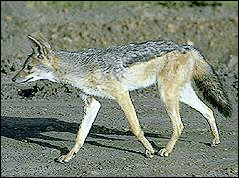

In [ ]:
import requests

response = requests.get("https://httpbin.org/image/jpeg", timeout=10)
with open("./test.jpg", "wb") as f:
    f.write(response.content)

# IPython で画像を表示
from IPython.display import Image, display_jpeg
display_jpeg(Image('test.jpg'))

次のコードは、httpbin.org が提供する Web API において、 GET リクエストをパラメータ付きで発行する例である。 `requests.Response` オブジェクトの `url` 属性を参照して、リクエストした URL を確認している。クエリ文字列が組み立てられ、URL エンコードも行われたことがわかる。

In [ ]:
import requests

params = {'key1': 'value1', 'key2': ['value2', 'あ い']}
response = requests.get('https://httpbin.org/get', params=params)
print(response.url)

https://httpbin.org/get?key1=value1&key2=value2&key2=%E3%81%82+%E3%81%84


次のコードは、[zipcloud](https://zipcloud.ibsnet.co.jp/) が提供している郵便番号検索 API を利用する例である。API の詳細は https://zipcloud.ibsnet.co.jp/doc/api を参照。レスポンスのメッセージボディは JSON 形式となっているので、`requests.Response` オブジェクトの `json()` メソッドで辞書に変換している。

In [ ]:
import requests

# 郵便番号検索API
url = "https://zipcloud.ibsnet.co.jp/api/search"
params = {"zipcode": 7830060}
r = requests.get(url, params)
r.json()

{'message': None,
 'results': [{'address1': '高知県',
   'address2': '南国市',
   'address3': '蛍が丘',
   'kana1': 'ｺｳﾁｹﾝ',
   'kana2': 'ﾅﾝｺｸｼ',
   'kana3': 'ﾎﾀﾙｶﾞｵｶ',
   'prefcode': '39',
   'zipcode': '7830060'}],
 'status': 200}

### フォーム自動入力

Requests パッケージだけで Web フォームに自動入力する例を示すために、httpbin.org のテスト用フォームを使用する。

  * http://httpbin.org/forms/post

このページでは、フォームに入力して「Submit order」ボタンを押すと、送信した内容がレスポンスボディの JSON の `'form'` キーに格納される形で返される。`'form'` キーの値は JSON オブジェクトである。

このページの HTML ソースは次のようになっている。

``` html
<!DOCTYPE html>
<html>
  <head>
  </head>
  <body>
  <!-- Example form from HTML5 spec http://www.w3.org/TR/html5/forms.html#writing-a-form's-user-interface -->
  <form method="post" action="/post">
   <p><label>Customer name: <input name="custname"></label></p>
   <p><label>Telephone: <input type=tel name="custtel"></label></p>
   <p><label>E-mail address: <input type=email name="custemail"></label></p>
   <fieldset>
    <legend> Pizza Size </legend>
    <p><label> <input type=radio name=size value="small"> Small </label></p>
    <p><label> <input type=radio name=size value="medium"> Medium </label></p>
    <p><label> <input type=radio name=size value="large"> Large </label></p>
   </fieldset>
   <fieldset>
    <legend> Pizza Toppings </legend>
    <p><label> <input type=checkbox name="topping" value="bacon"> Bacon </label></p>
    <p><label> <input type=checkbox name="topping" value="cheese"> Extra Cheese </label></p>
    <p><label> <input type=checkbox name="topping" value="onion"> Onion </label></p>
    <p><label> <input type=checkbox name="topping" value="mushroom"> Mushroom </label></p>
   </fieldset>
   <p><label>Preferred delivery time: <input type=time min="11:00" max="21:00" step="900" name="delivery"></label></p>
   <p><label>Delivery instructions: <textarea name="comments"></textarea></label></p>
   <p><button>Submit order</button></p>
  </form>
  </body>
</html>
```

`form` 要素の `method` 属性と `action` 属性により、このページのフォームでは URL `http://httpbin.org/post` に対して POST リクエストを行うことがわかる。メッセージボディには、 `input` 要素に入力するデータ（顧客名やメールアドレスなど）が含まれる。

したがって、各 `input` 要素の `name` 属性をキーとする辞書を伴って `requests.post()` 関数を呼び出すことで、フォームに入力した状態で送信するのと同等の結果が得られる。

`input` 要素の `type` 属性が `radio` の場合は、同じ `name` 属性の `input` 要素のうち、選択するものの `value` 属性の値を設定する。

`input` 要素の `type` 属性が `checkbox` の場合は、同じ `name` 属性の `input` 要素のうち、選択するものの `value` 属性の値のリストを設定する。

`input` 要素の `type` 属性が `time` の場合は、値を `hh:mm` の形式（`step` 属性で秒を刻む場合は `hh:mm:ss` の形式）で設定する。

次のコードは、フォームの入力値を `requests.post()` 関数に渡す例である。 `order_payload` 変数にフォームの入力値を表す辞書を指定し、 `requests.post()` 関数に渡している。関数呼び出しの結果、返された JSON を解析して出力している。

In [ ]:
import requests

url = "http://httpbin.org//post"
order_payload = {
    "custname": "John Smith",
    "custtel": "0123-123-1234",
    "custemail": "John@example.com",
    "size": "medium",
    "topping": ["bacon", "onion", "mushroom"],
    "delivery": "18:30",
    "comments": "Please come to the entrance",
}
r = requests.post(url, order_payload)
r.json().get("form")

{'comments': 'Please come to the entrance',
 'custemail': 'John@example.com',
 'custname': 'John Smith',
 'custtel': '0123-123-1234',
 'delivery': '18:30',
 'size': 'medium',
 'topping': ['bacon', 'onion', 'mushroom']}